# Student Performance Indicator

## Life cycle of Machine learning Project
 1. Understanding the Problem Statement
 2. Data Collection
 3. Data Checks to perform
 4. Exploratory data analysis
 5. Data Pre-Processing
 6. Model Training
 7. Choose best model

## 1. Problem Statement 
 - This project understands how the students' test scores are affected by many features like gender, race, parental level of education, lunch & test preparation course. 

## 2. Data Collection
 - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
 - The data consists of 8 column and 1000 rows.

### 2.1. Importing data & necessary packages
Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data 

In [2]:
data = pd.read_csv("data/StudentsPerformance.csv")

Display the top 5 samples

In [3]:
data.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

Shape of dataset

In [4]:
data.shape

(1000, 8)

### 2.2. Dataset Information

The following are the columns:
 - gender : sex of students 
         -> Male/Female
 - race/ethnicity : ethnicity of students 
         -> Group A/B/C/D/E
 - parental level of eeducation : parents' last education 
         -> bachelor's degree/master's degree/some college/asssociate's degree/high school/some high school
 - lunch : type of lunch before test 
         -> standard/free or reduced
 - test preparation course : how much course prepared before test
         -> completed/none
 - math score
 - reading score
 - writing score

## 3. Data Checks to perform
 - Missing values
 - Duplicates
 - Data type
 - No. of unique values of each column
 - Statistics of data set
 - Categorical columns
 - Exploring data

### 3.1. Check missing values

In [5]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset.

### 3.2. Check duplicates 

In [6]:
data.duplicated().sum()

0

There are no duplicates in the dataset

### 3.3. Check data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


The first 5 columns are categorical columns. 

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.4. Check number of unique values of each column

In [9]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5. Check statistics of dataset

In [10]:
data.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

 From above description of numerical data
  - all means are almost close to each other (66 to 68)
  - all standard deviations are also close (14.6 to 15.19)
  - While there is a variation in minimum score for 'math' at 0 , 'writing' at 10, and 'reading' is much higher at 17 

### 3.6. Handling categorical columns

In [11]:
print("Categories in 'gender' variable:",end=" " )
print(data['gender'].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(data['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(data['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:",end=" " )
print(data['lunch'].unique())

print("Categories in 'test preparation course' variable:",end=" " )
print(data['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


### 3.7. Exploring data 
We need two new columns for student's total score from all three scores for maths, reading and writing as well as their average. 
#### Adding columns "Total Score" & "Average" 

In [12]:
data["total_score"] = data["math_score"] + data["writing_score"] + data["reading_score"]
data["average"] = data["total_score"] / 3
data.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [13]:
# Full marks in which numeric feature: 
best_performance = max(numeric_features, key=lambda numeric_features: (data[numeric_features] == 100).sum()).split("_")[0].capitalize()

# Less than 20 marks in which numeric feature: 
worst_performance = max(numeric_features, key=lambda numeric_features: (data[numeric_features] <= 20).sum()).split("_")[0].capitalize()

print(f"More students scored full marks and performed best in '{best_performance}'")
print(f"More students scored less than 20 marks and performed worst in '{worst_performance}'")


More students scored full marks and performed best in 'Reading'
More students scored less than 20 marks and performed worst in 'Math'


## 4. Exploring Data ( Visualization )
 - Visualize average & total score distribution
 - Maximum score of students in all 2 subjects
 - Multivariate analysis using pieplot
 - Feature-wise Visualization
     - Univariate & Bivariate Analysis for each feature
     - Checking Outliers
     - Multivariate Analysis using Pairplot 

### 4.1. Visualize average & total score distribution.

Histograms & Kernel Distribution Function (KDE) for average & total score with respect to each feature to make some insightful conclusion.

####  => Based on Gender

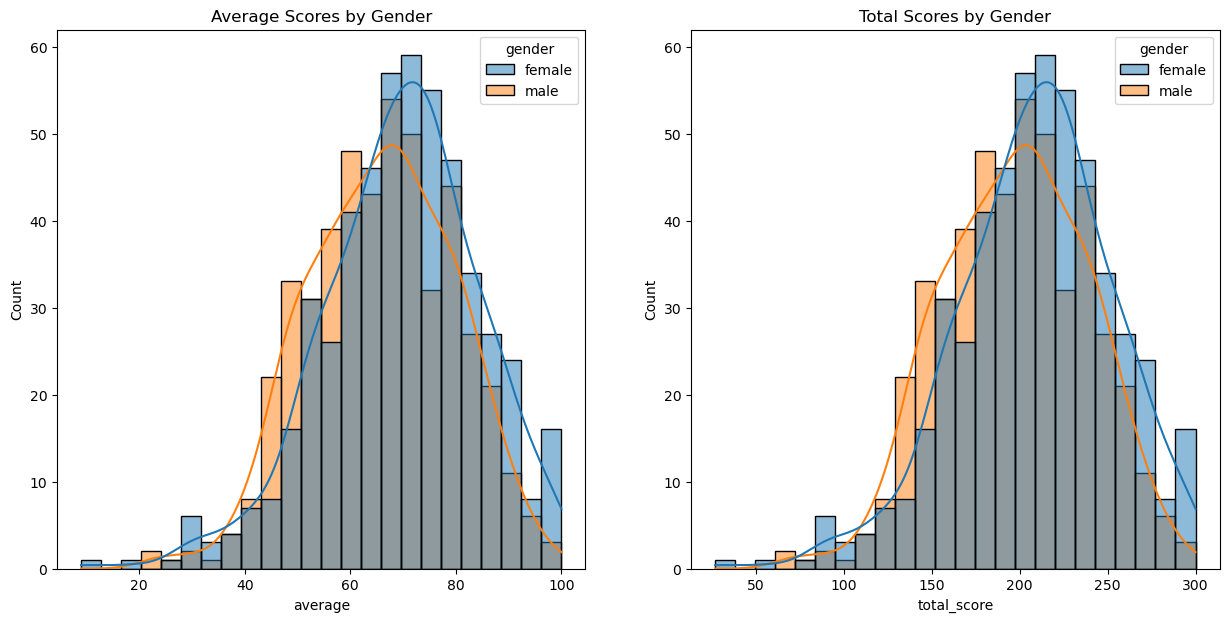

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data,x='average',kde=True,hue='gender')
plt.title('Average Scores by Gender')

plt.subplot(122)
sns.histplot(data,x='total_score',kde=True,hue='gender')
plt.title('Total Scores by Gender')
plt.show()

Female students tend to perfom well then male students.

####  => Based on ethnicity

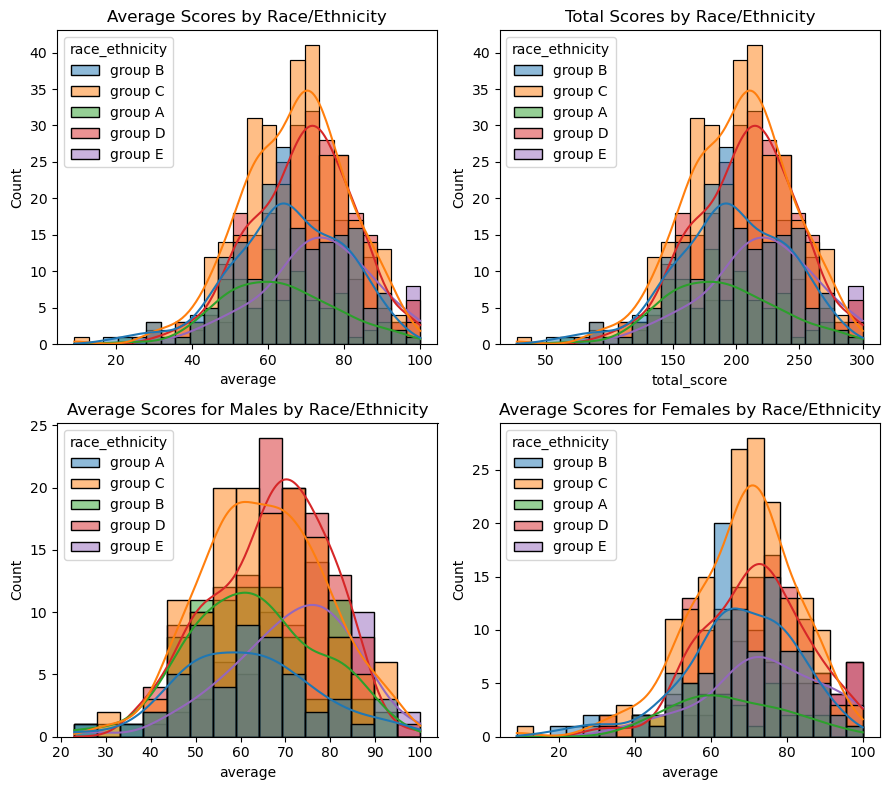

In [15]:
plt.subplots(2, 2, figsize=(9, 8))

plt.subplot(221)
sns.histplot(data, x='average', kde=True, hue='race_ethnicity')
plt.title('Average Scores by Race/Ethnicity')
plt.subplot(222)
sns.histplot(data, x='total_score', kde=True, hue='race_ethnicity')
plt.title('Total Scores by Race/Ethnicity')

plt.subplot(223)
sns.histplot(data[data.gender == 'male'], x='average', kde=True, hue='race_ethnicity')
plt.title('Average Scores for Males by Race/Ethnicity')
plt.subplot(224)
sns.histplot(data[data.gender == 'female'], x='average', kde=True, hue='race_ethnicity')
plt.title('Average Scores for Females by Race/Ethnicity')

plt.tight_layout()
plt.show()


Students of group A & group B tend to perform poorly in exam irrespective to their gender.

#### => Based on parental level of education

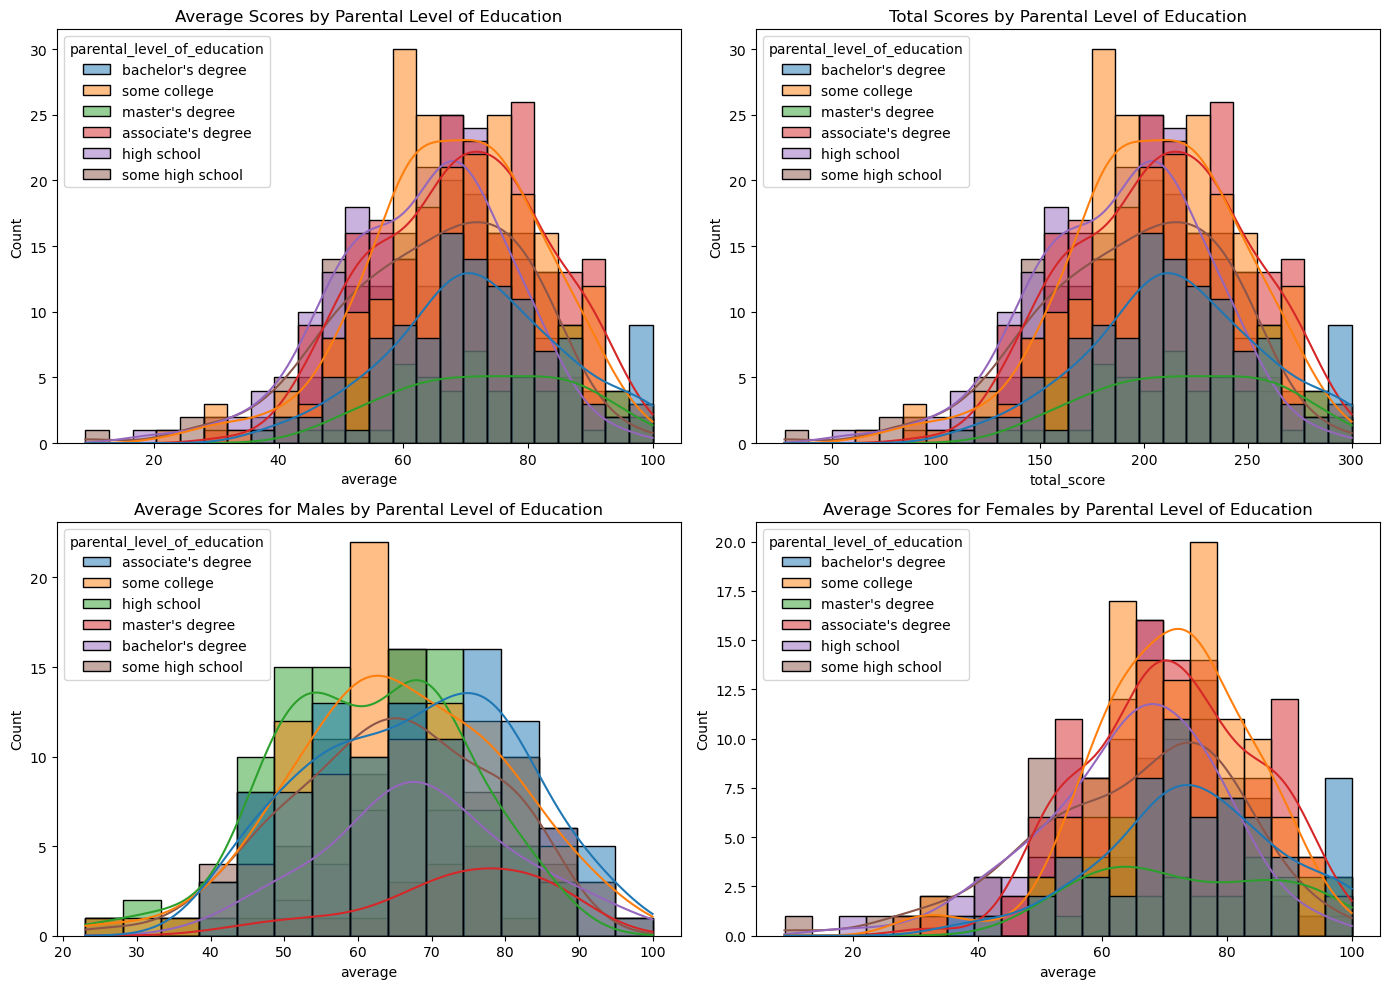

In [16]:
plt.subplots(2, 2, figsize=(14, 10))

plt.subplot(221)
sns.histplot(data, x='average', kde=True, hue='parental_level_of_education')
plt.title('Average Scores by Parental Level of Education')
plt.subplot(222)
sns.histplot(data, x='total_score', kde=True, hue='parental_level_of_education')
plt.title('Total Scores by Parental Level of Education')

plt.subplot(223)
sns.histplot(data[data.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Average Scores for Males by Parental Level of Education')
plt.subplot(224)
sns.histplot(data[data.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Average Scores for Females by Parental Level of Education')

plt.tight_layout()
plt.show()

In general parent's education doesn't play any huge role in student's performance in test. However, 3rd plot shows that male student tends to perform well in exam whose parents have either master's degree or associate's degree. 

#### => Based on lunch

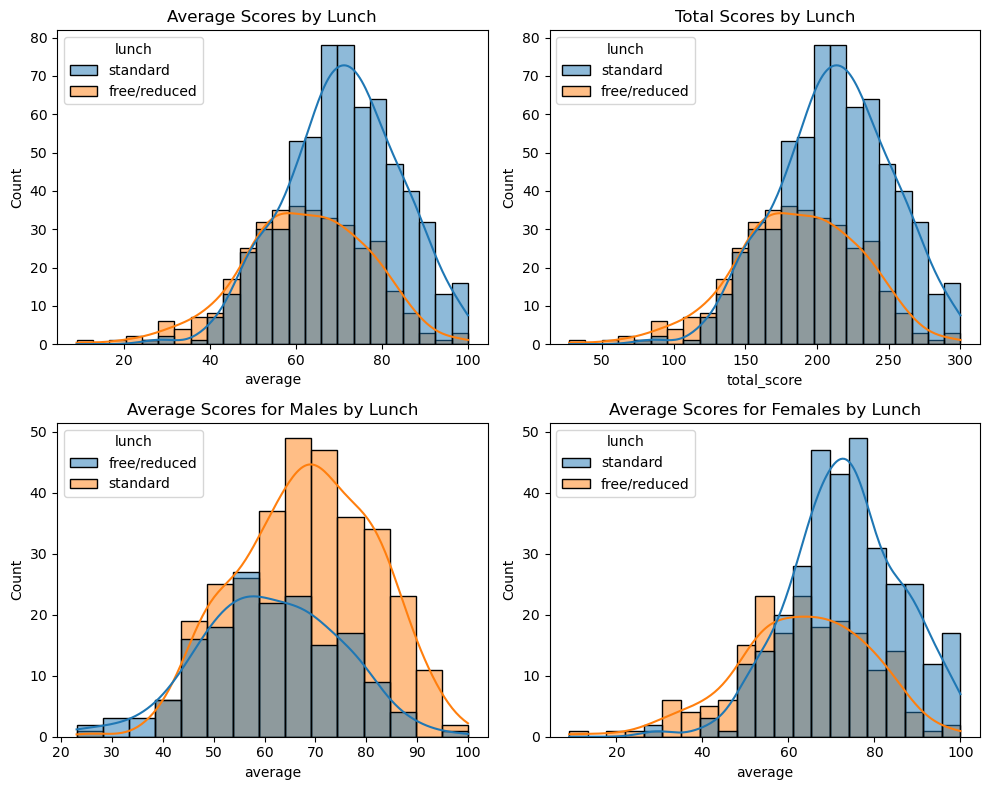

In [17]:
plt.subplots(2, 2, figsize=(10, 8))

plt.subplot(221)
sns.histplot(data, x='average', kde=True, hue='lunch')
plt.title('Average Scores by Lunch')
plt.subplot(222)
sns.histplot(data, x='total_score', kde=True, hue='lunch')
plt.title('Total Scores by Lunch')

plt.subplot(223)
sns.histplot(data[data.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title('Average Scores for Males by Lunch')
plt.subplot(224)
sns.histplot(data[data.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title('Average Scores for Females by Lunch')

plt.tight_layout()
plt.show()

Standard lunch seems to be the best option to have before exam be, it male or female.

### 4.2. Maximum score of students in all 3 subjects.

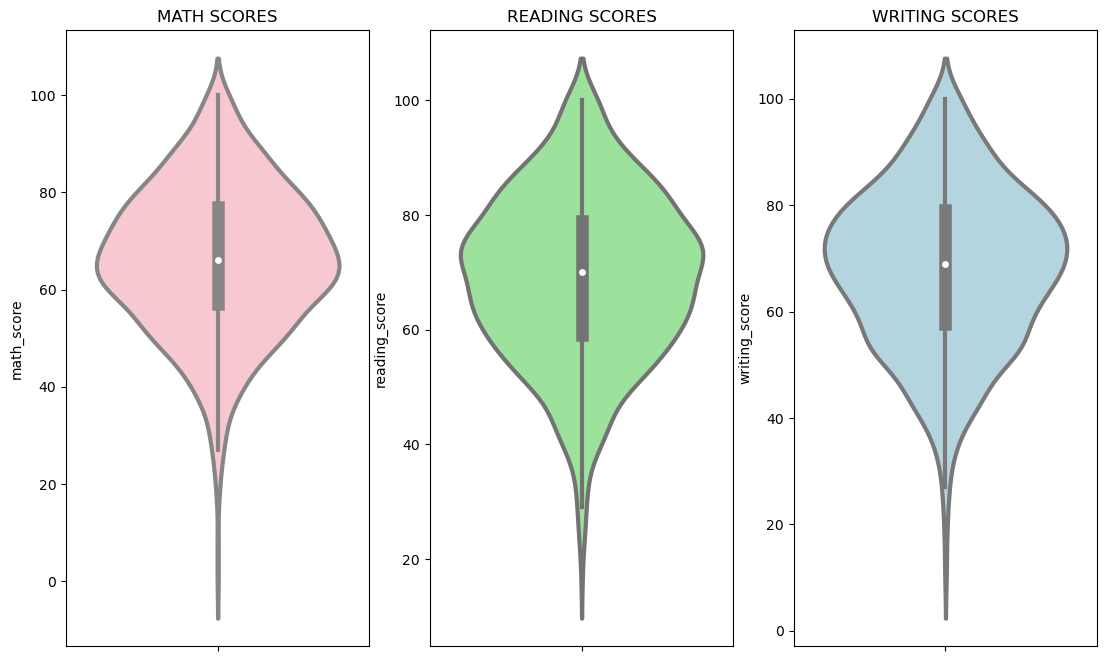

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='pink',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='lightgreen',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='lightblue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3. Multivariate analysis using pieplot

In [19]:
# Assigning colors to each feature and their unique values
gender = {'Female' : '#f52891cc', 'Male' : '#1313eecc'}

race = {'group C' : "#2E5B88",
        'group D' : "#497AA7",
        'group B' : "#73A4CA",
        'group E' : "#9FCAE6",
        'group A' : "#B9DDF1"}

lunch = {'Standard' : '#ffdf29', 'Free' : '#ff622a'}

test_course = {'None' : '#ff0000c2', 'Completed' : '#13b813de'}

parental_education = {'some college': '#1e5731e6' , 
                      "associate's degree" : '#4C9A2A' ,
                      'high school' : '#76BA1B' ,
                      'some high school' : '#A4DE02',
                      "bachelor's degree" : '#68BB59',
                      "master's degree" : '#ACDF87' }

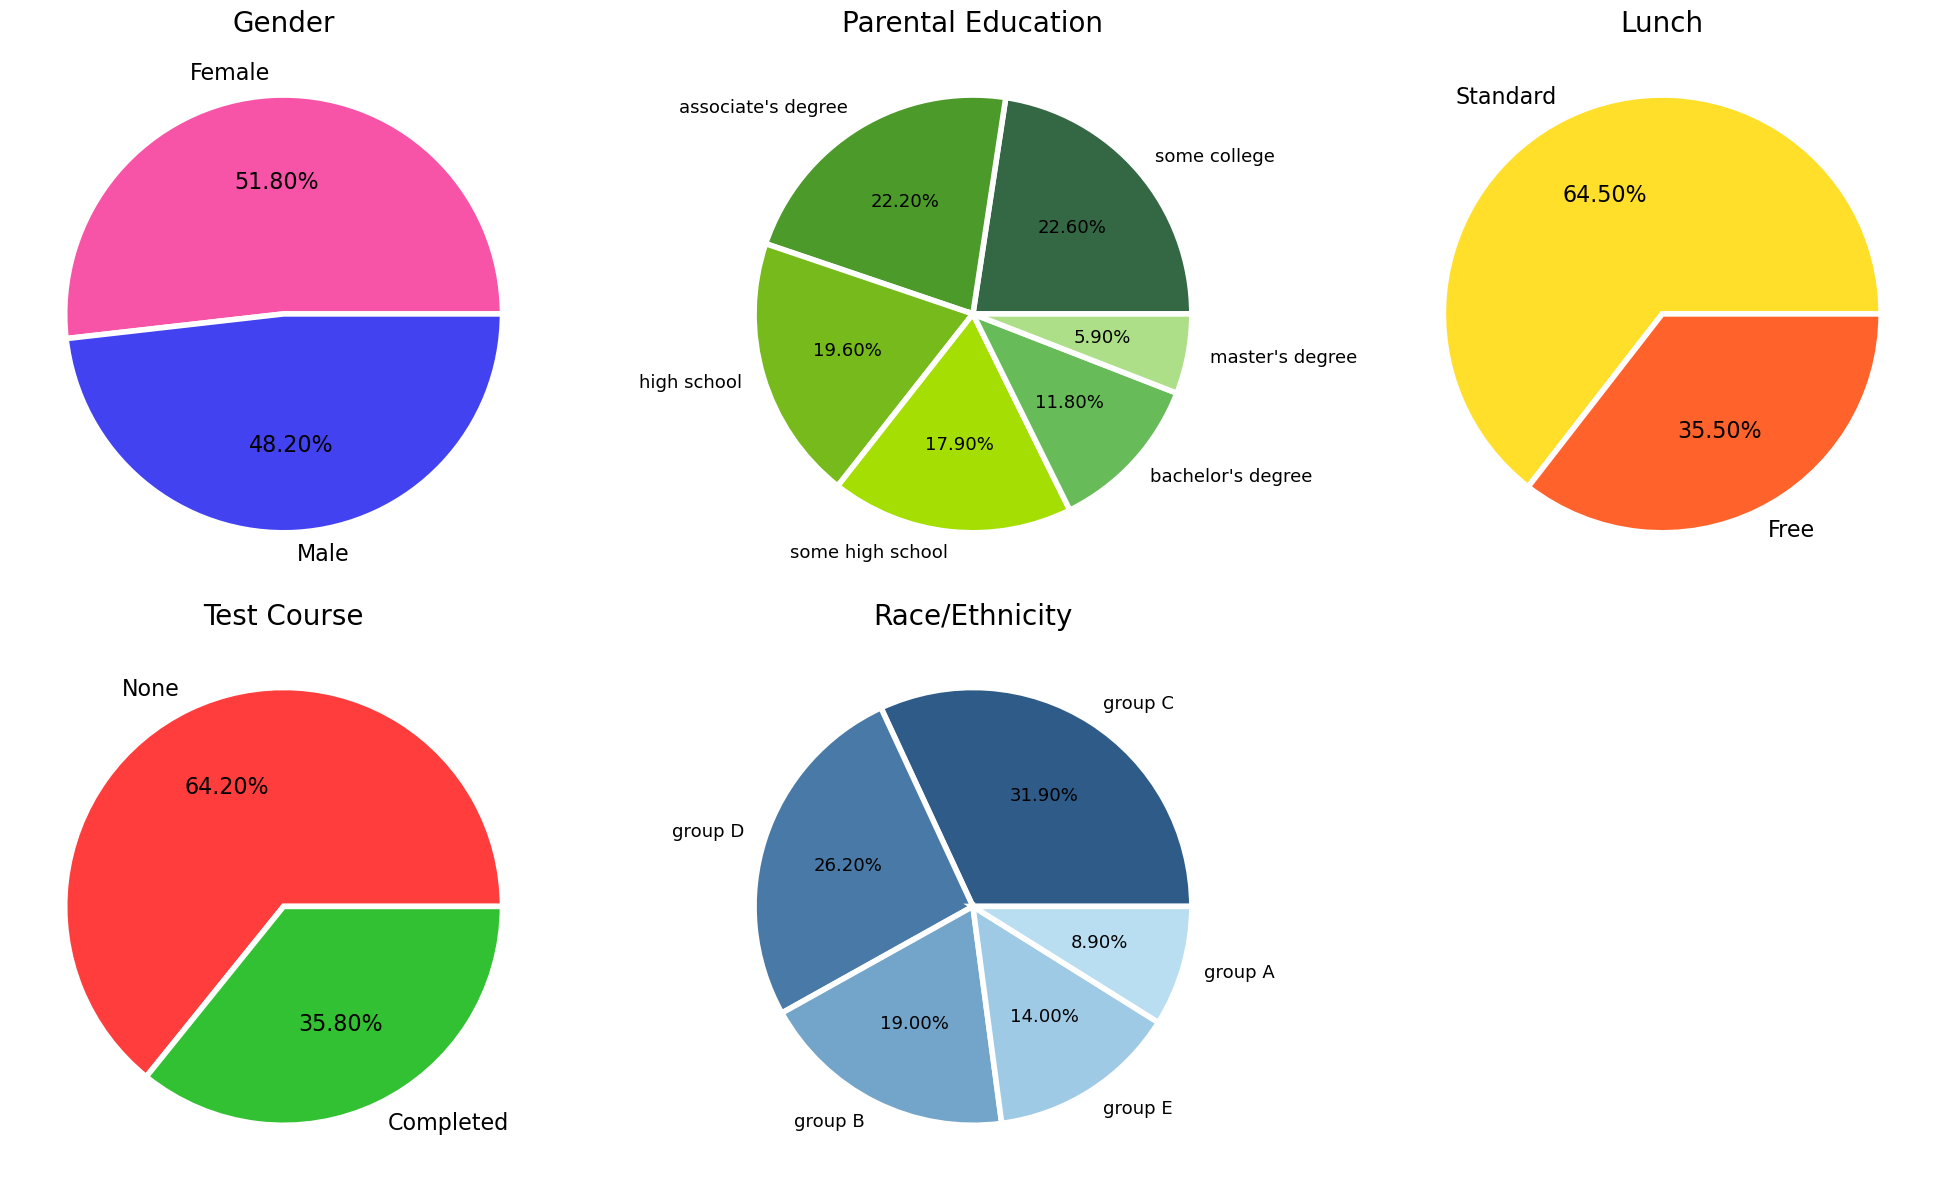

In [20]:
plt.figure(figsize=(20, 12))

# Gender
plt.subplot(2, 3, 1)
size = data['gender'].value_counts()
plt.pie(size, colors = gender.values(), labels = gender.keys(),autopct = '%.2f%%', textprops={'fontsize':16},
        wedgeprops={"edgecolor":"white",'linewidth': 4})
plt.title('Gender', fontsize = 20)
plt.axis('off')

#Parental Education
plt.subplot(2, 3, 2)
size = data['parental_level_of_education'].value_counts()
plt.pie(size, colors = parental_education.values(), labels = parental_education.keys(),autopct = '%.2f%%', textprops={'fontsize':13},
        wedgeprops={"edgecolor":"white",'linewidth': 4})
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

#Lunch
plt.subplot(2, 3, 3)
size = data['lunch'].value_counts()
plt.pie(size, colors = lunch.values(),labels = lunch.keys(),autopct = '%.2f%%', textprops={'fontsize':16},
        wedgeprops={"edgecolor":"white",'linewidth': 4})
plt.title('Lunch', fontsize = 20)
plt.axis('off')

#Test Course
plt.subplot(2, 3, 4)
size = data['test_preparation_course'].value_counts()
plt.pie(size, colors = test_course.values(),labels = test_course.keys(),autopct = '%.2f%%', textprops={'fontsize':16},
        wedgeprops={"edgecolor":"white",'linewidth': 4})
plt.title('Test Course', fontsize = 20)
plt.axis('off')

#Race
plt.subplot(2, 3, 5)
size = data['race_ethnicity'].value_counts()
plt.pie(size, colors = race.values(),labels = race.keys(),autopct = '%.2f%%', textprops={'fontsize':13},
        wedgeprops={"edgecolor":"white",'linewidth': 4})
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


###### Observations 
 - Gender : Number of Male and Female students is almost equal
 - Race : Group C students are a majority
 - Lunch : Having standard is more common than free lunch among students
 - Test Course : More than half of the students haven't enrolled in any test preparation course
 - Parental Education : Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4. Feature-wise Visualization

### 4.4.1. Univariate & Bivariate Analysis

 - Univariate Analysis : How is the group-wise distribution?
 - Bivariate Analysis : Does the feature have any impact on student's performance?

####  ► Gender Column - Univariate Analysis

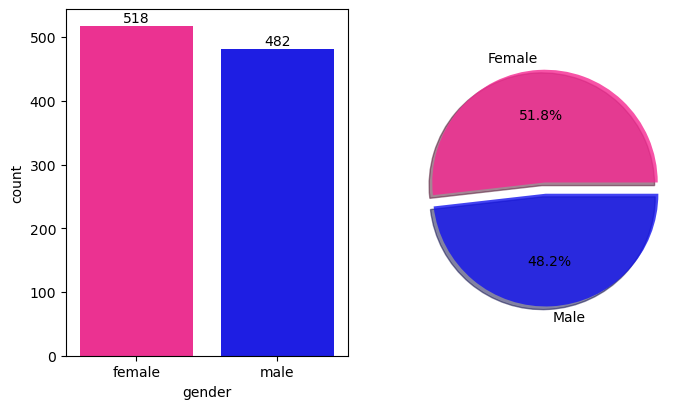

In [21]:
f,ax=plt.subplots(1,2,figsize=(8,4.5))
sns.countplot(x=data['gender'],data=data,palette =gender.values(),ax=ax[0],saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=data['gender'].value_counts(),labels=gender.keys(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors = gender.values())
plt.show()

####  ► Gender Column - Bivariate Analysis

In [22]:
gender_group = data.groupby('gender').mean()
gender_group

math_score  reading_score  writing_score  total_score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483

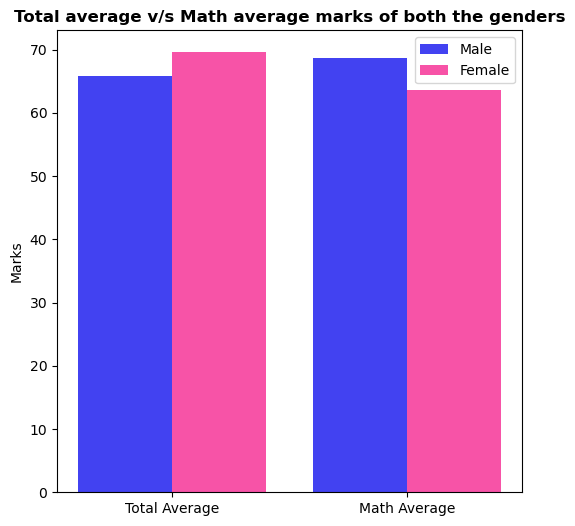

In [23]:
plt.figure(figsize=(6, 6))

X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male',color =list(gender.values())[1])
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female',color =list(gender.values())[0])
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights

 - Gender has balanced data where female students are 518 (52%) and male students are 482 (48%)
 - On an average females have a better overall score than male.
 - However males have scored higher in Maths.

####  ► Race Column - Univariate Analysis

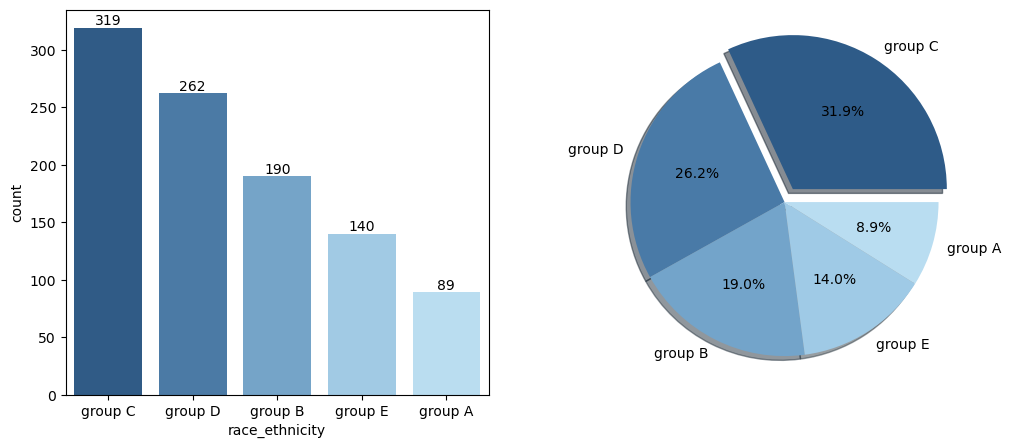

In [24]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=data['race_ethnicity'],data=data,order = list(race.keys()),palette = race.values(),ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=race.values())
plt.show() 

####  ► Race Column - Bivariate Analysis

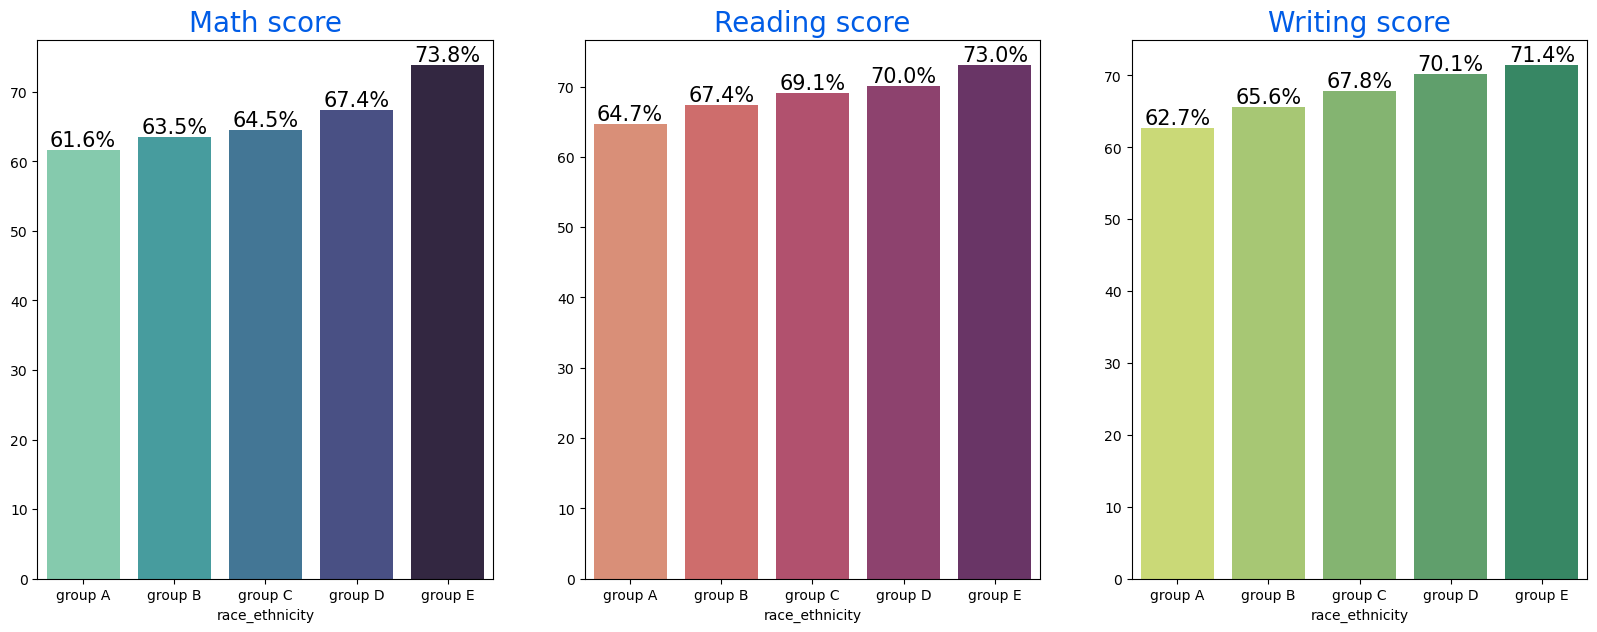

In [25]:
race_group=data.groupby('race_ethnicity')

f,ax=plt.subplots(1,3,figsize=(20,7))
# Math_score
sns.barplot(x=race_group['math_score'].mean().index,y=race_group['math_score'].mean().values,palette = 'mako_r',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15,fmt='%.1f%%')

# Reading_score
sns.barplot(x=race_group['reading_score'].mean().index,y=race_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15,fmt='%.1f%%')

# Writing_score
sns.barplot(x=race_group['writing_score'].mean().index,y=race_group['writing_score'].mean().values,palette = 'summer_r',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15,fmt='%.1f%%')

##### Insights

- Most of the student come from group C or group D.
- Lowest number of students belong to group A.
- Group E students have scored the highest marks in all the subjects whereas Group A students have scored the lowest marks.

####  ► Parental Education Level Column - Univariate Analysis

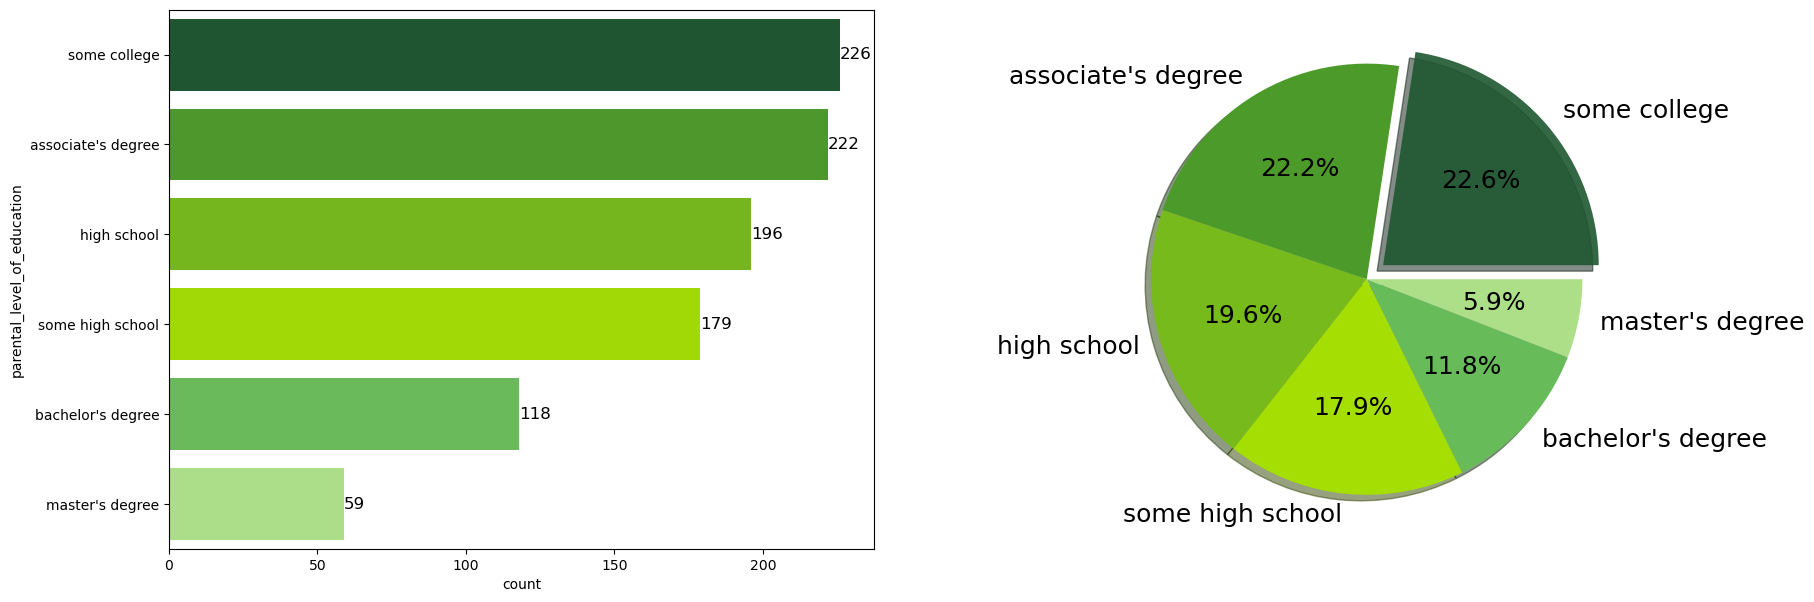

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,7))
sns.countplot(y=data['parental_level_of_education'],data=data, order = list(parental_education.keys()),
              orient="h",palette = parental_education.values(),ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
    
plt.pie(x = data['parental_level_of_education'].value_counts(), labels=data['parental_level_of_education'].value_counts().index,
        explode=[0.1,0,0,0,0,0],autopct='%1.1f%%', textprops={'fontsize':18},shadow=True,colors=parental_education.values())
plt.show()

####  ► Parental Education Level Column - Bivariate Analysis

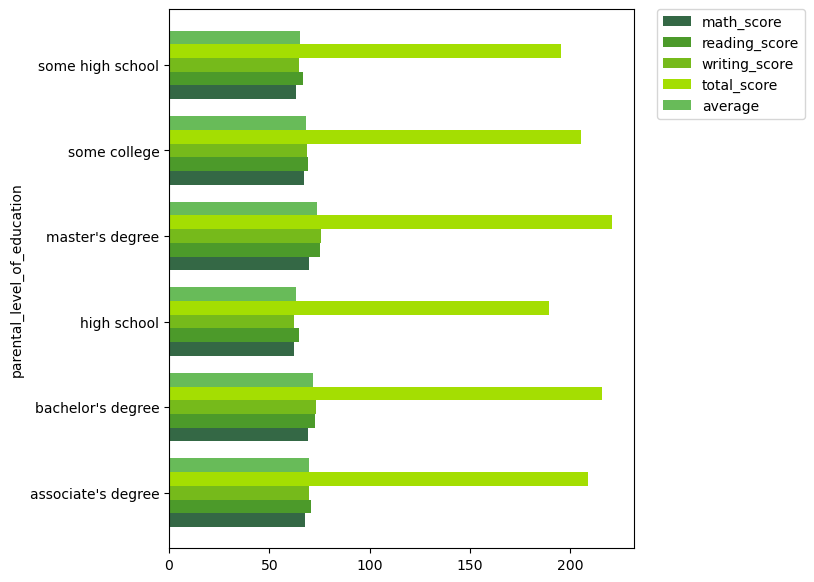

In [27]:
data.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(6,7),color=parental_education.values(),width=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Insights

 - Maximum students are children of parents from some college.
 - The test score of student whose parents possess master and bachelor level education are higher than others.

####  ► Lunch  Column - Univariate Analysis

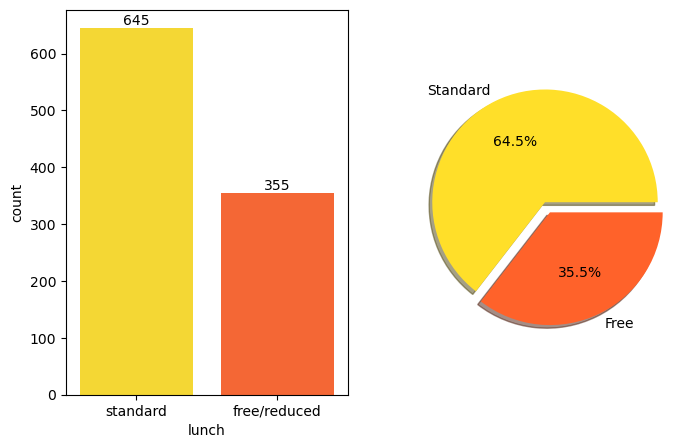

In [28]:
f,ax=plt.subplots(1,2,figsize=(8,5))
sns.countplot(x=data['lunch'],data=data,palette =lunch.values(),ax=ax[0],saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=data['lunch'].value_counts(),labels=lunch.keys(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors = lunch.values())
plt.style.use('default')
plt.show()

####  ► Lunch  Column - Bivariate Analysis

In [29]:
lunch_group = data.groupby('lunch').mean()
lunch_group

math_score  reading_score  writing_score  total_score    average
lunch                                                                         
free/reduced   58.921127      64.653521      63.022535   186.597183  62.199061
standard       70.034109      71.654264      70.823256   212.511628  70.837209

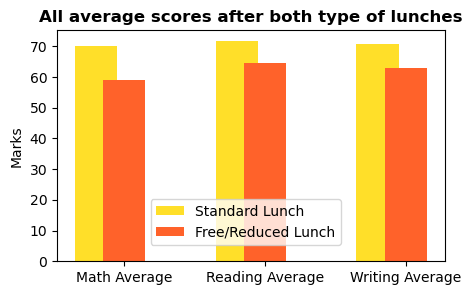

In [30]:
plt.figure(figsize=(5, 3))

X = ['Math Average','Reading Average','Writing Average']

free_scores = [lunch_group['math_score'][0],lunch_group['reading_score'][0],lunch_group['writing_score'][0]]
standard_scores = [lunch_group['math_score'][1],lunch_group['reading_score'][1],lunch_group['writing_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, standard_scores, 0.3, label = 'Standard Lunch',color =list(lunch.values())[0])
plt.bar(X_axis , free_scores, 0.3, label = 'Free/Reduced Lunch',color =list(lunch.values())[1])
      
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("All average scores after both type of lunches", fontweight='bold')
plt.legend(bbox_to_anchor=(.75, .3), loc=1)
plt.show()

##### Insights

 - Standard lunch is most commmon among the sudents.
 - Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

####  ► Test Preparation Course - Univariate Analysis

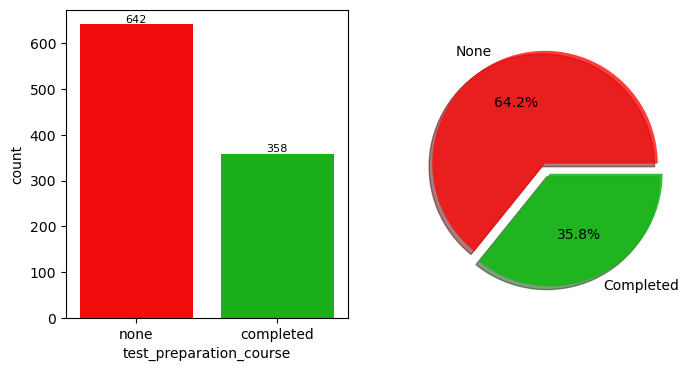

In [31]:
f,ax=plt.subplots(1,2,figsize=(8,4))
sns.countplot(x=data['test_preparation_course'],data=data,palette =test_course.values(),ax=ax[0],saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=8)
    
plt.pie(x=data['test_preparation_course'].value_counts(),labels=test_course.keys(),explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors = test_course.values())
plt.style.use('default')
plt.show()

####  ► Test Preparation Course Column - Bivariate Analysis

In [32]:
test_preparation_group = data.groupby('test_preparation_course').mean()
test_preparation_group

math_score  reading_score  writing_score  \
test_preparation_course                                             
completed                 69.695531      73.893855      74.418994   
none                      64.077882      66.534268      64.504673   

                         total_score    average  
test_preparation_course                          
completed                 218.008380  72.669460  
none                      195.116822  65.038941

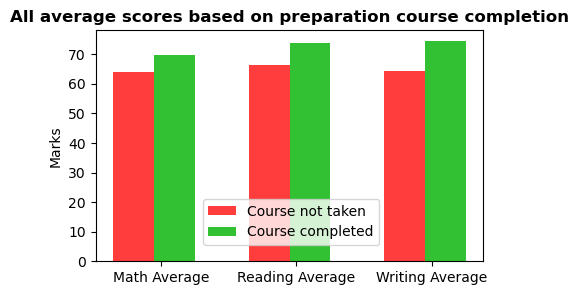

In [33]:
plt.figure(figsize=(5, 3))

X = ['Math Average','Reading Average','Writing Average']

course_taken_scores = [test_preparation_group['math_score'][0],
               test_preparation_group['reading_score'][0],
               test_preparation_group['writing_score'][0]]
course_not_taken_scores = [test_preparation_group['math_score'][1],
                   test_preparation_group['reading_score'][1],
                   test_preparation_group['writing_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, course_not_taken_scores, 0.3, label = 'Course not taken',color =list(test_course.values())[0])
plt.bar(X_axis+0.1, course_taken_scores, 0.3, label = 'Course completed',color =list(test_course.values())[1])
      
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("All average scores based on preparation course completion", fontweight='bold')
plt.legend(bbox_to_anchor=(.75, .3), loc=1)
plt.show()

##### Insights

 - More than half of the class of students haven't taken the test preparation course
 - Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course, even though the maths score have only a slight difference.

### 4.4.2.Checking Outliers

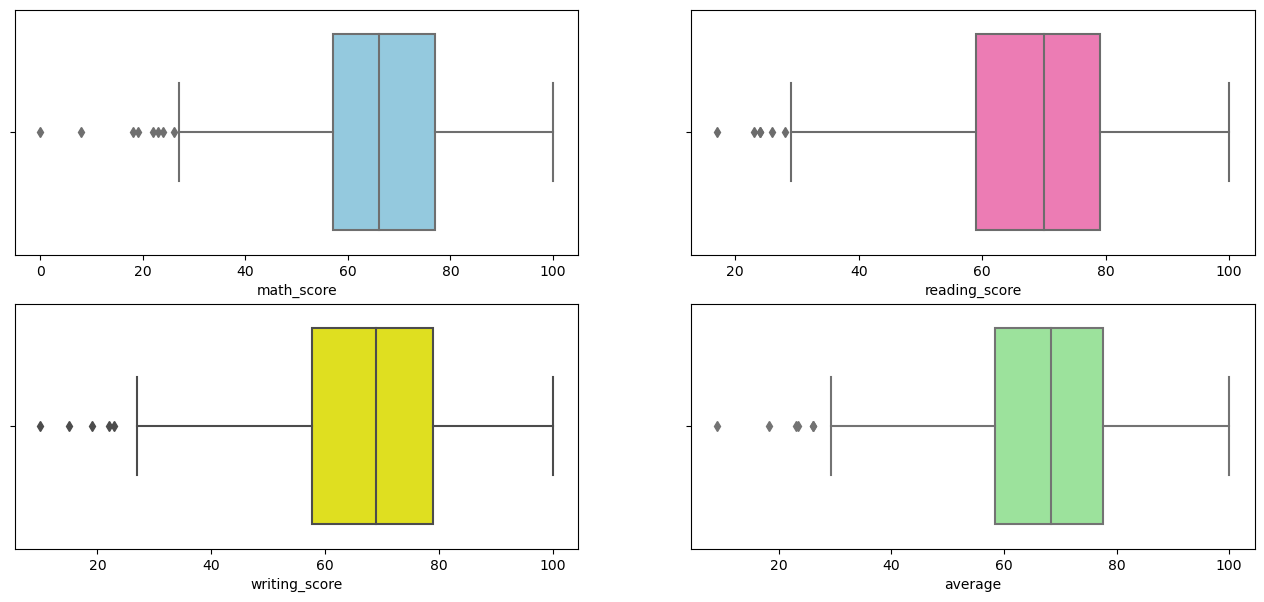

In [34]:
plt.subplots(1,4,figsize=(16,7))
plt.subplot(2,2,1)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(2,2,2)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(2,2,3)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(2,2,4)
sns.boxplot(data['average'],color='lightgreen')
plt.show()

### 4.4.3.Multivariate Analysis using Pairplot

####  ► Based on Gender

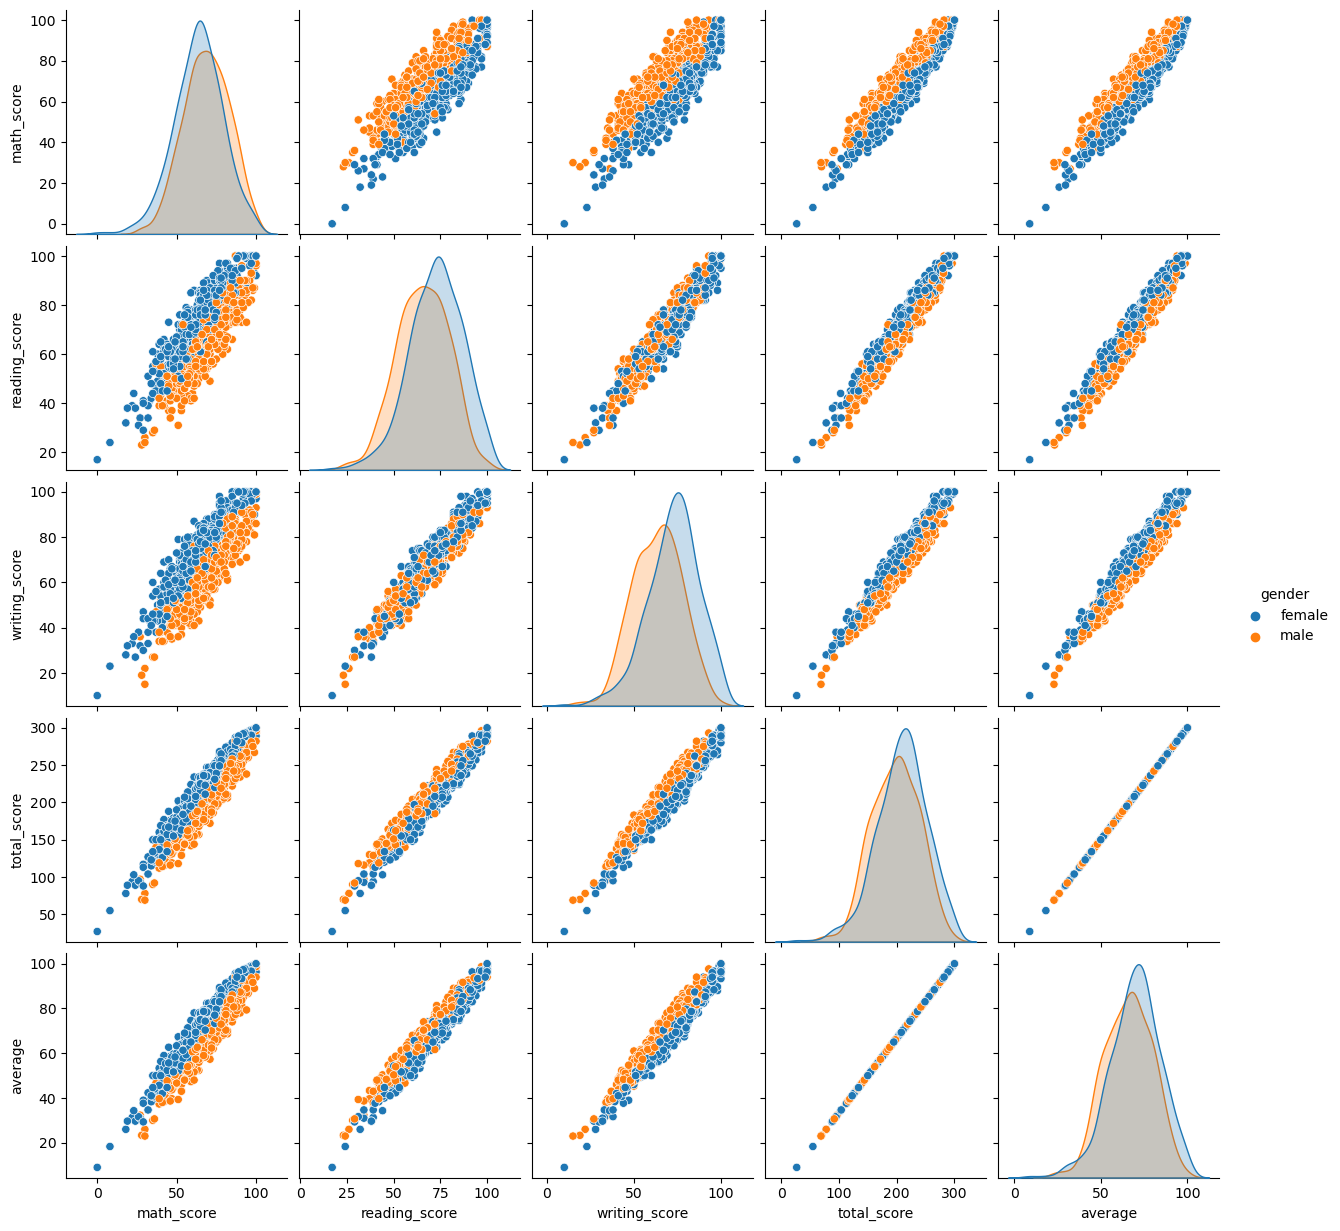

In [35]:
sns.pairplot(data,hue = 'gender')
plt.show()

####  ► Based on Race/Ethnicity

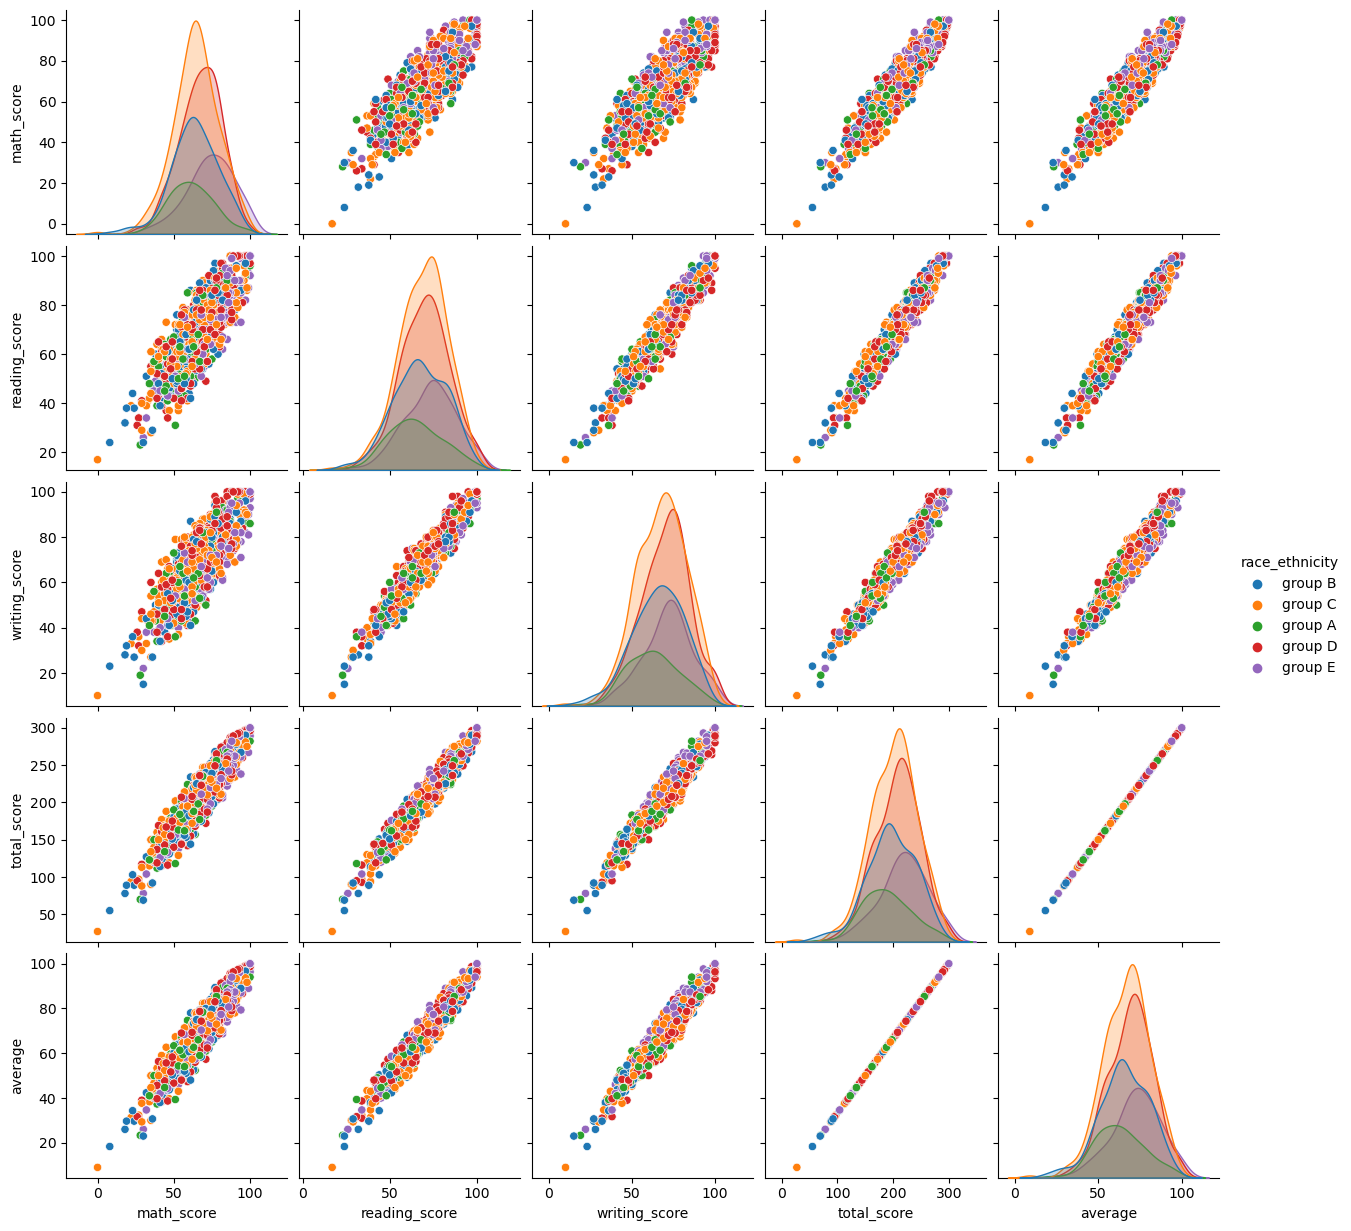

In [36]:
sns.pairplot(data,hue = 'race_ethnicity')
plt.show()

####  ► Based on Parental Education

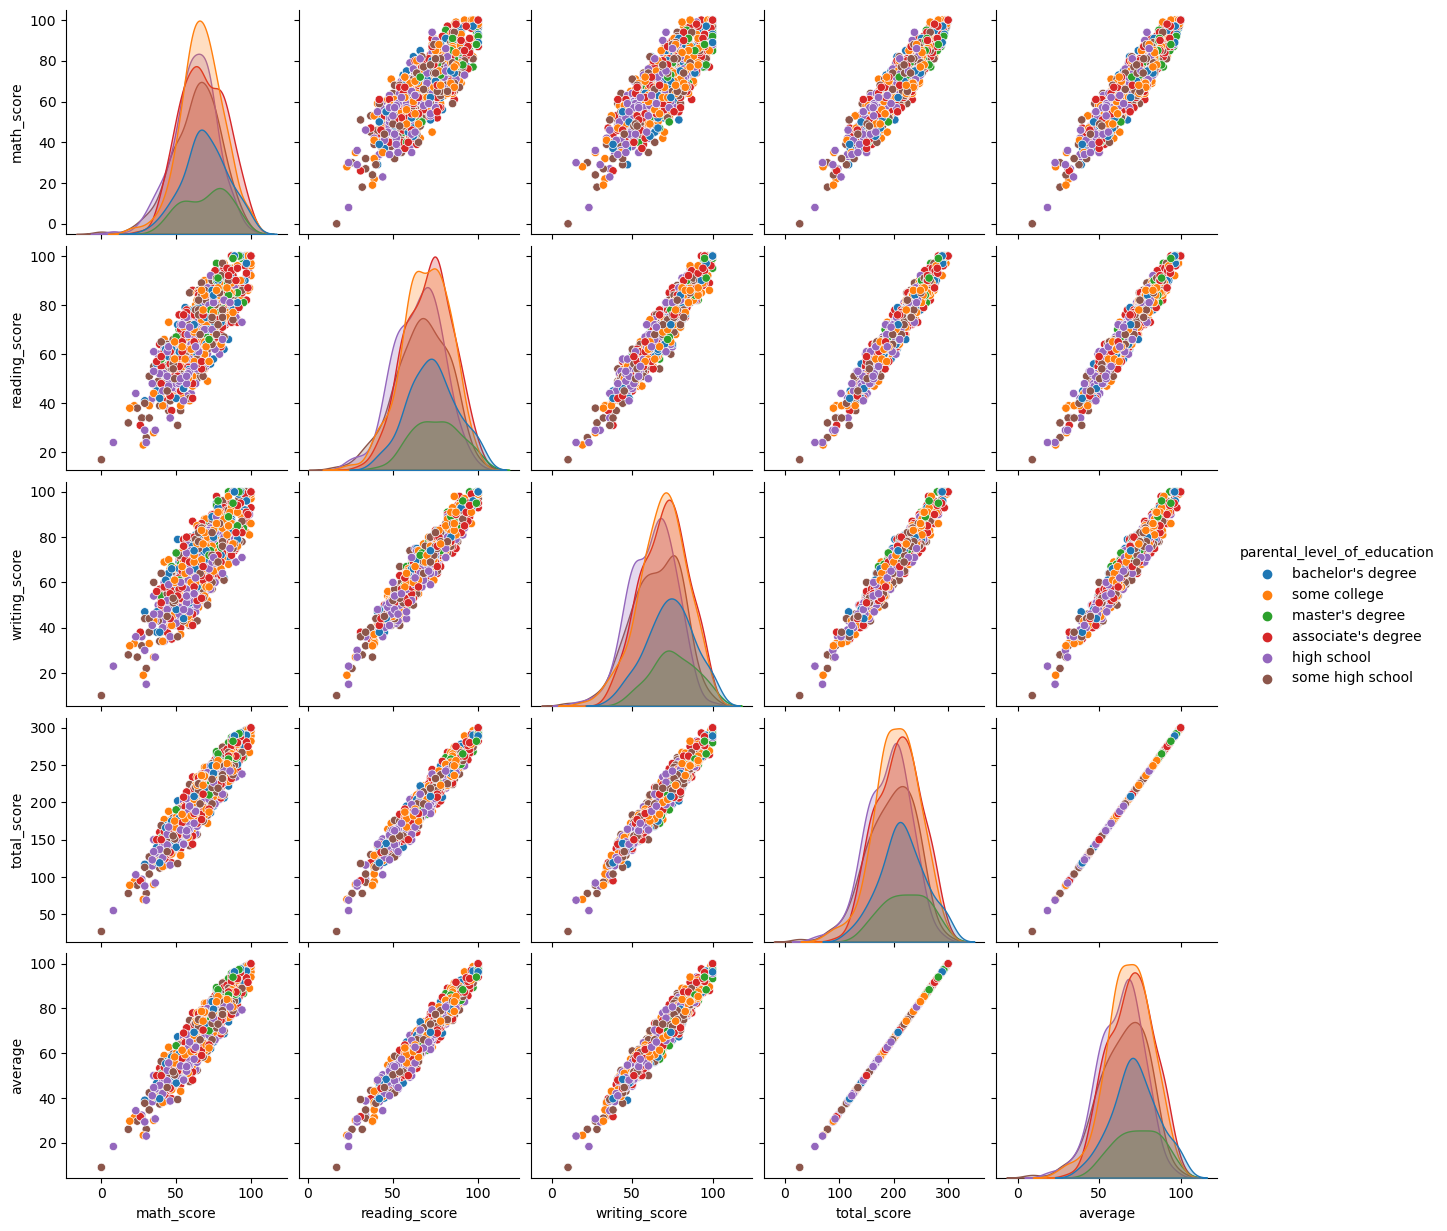

In [37]:
sns.pairplot(data,hue = 'parental_level_of_education')
plt.show()

####  ► Based on Lunch

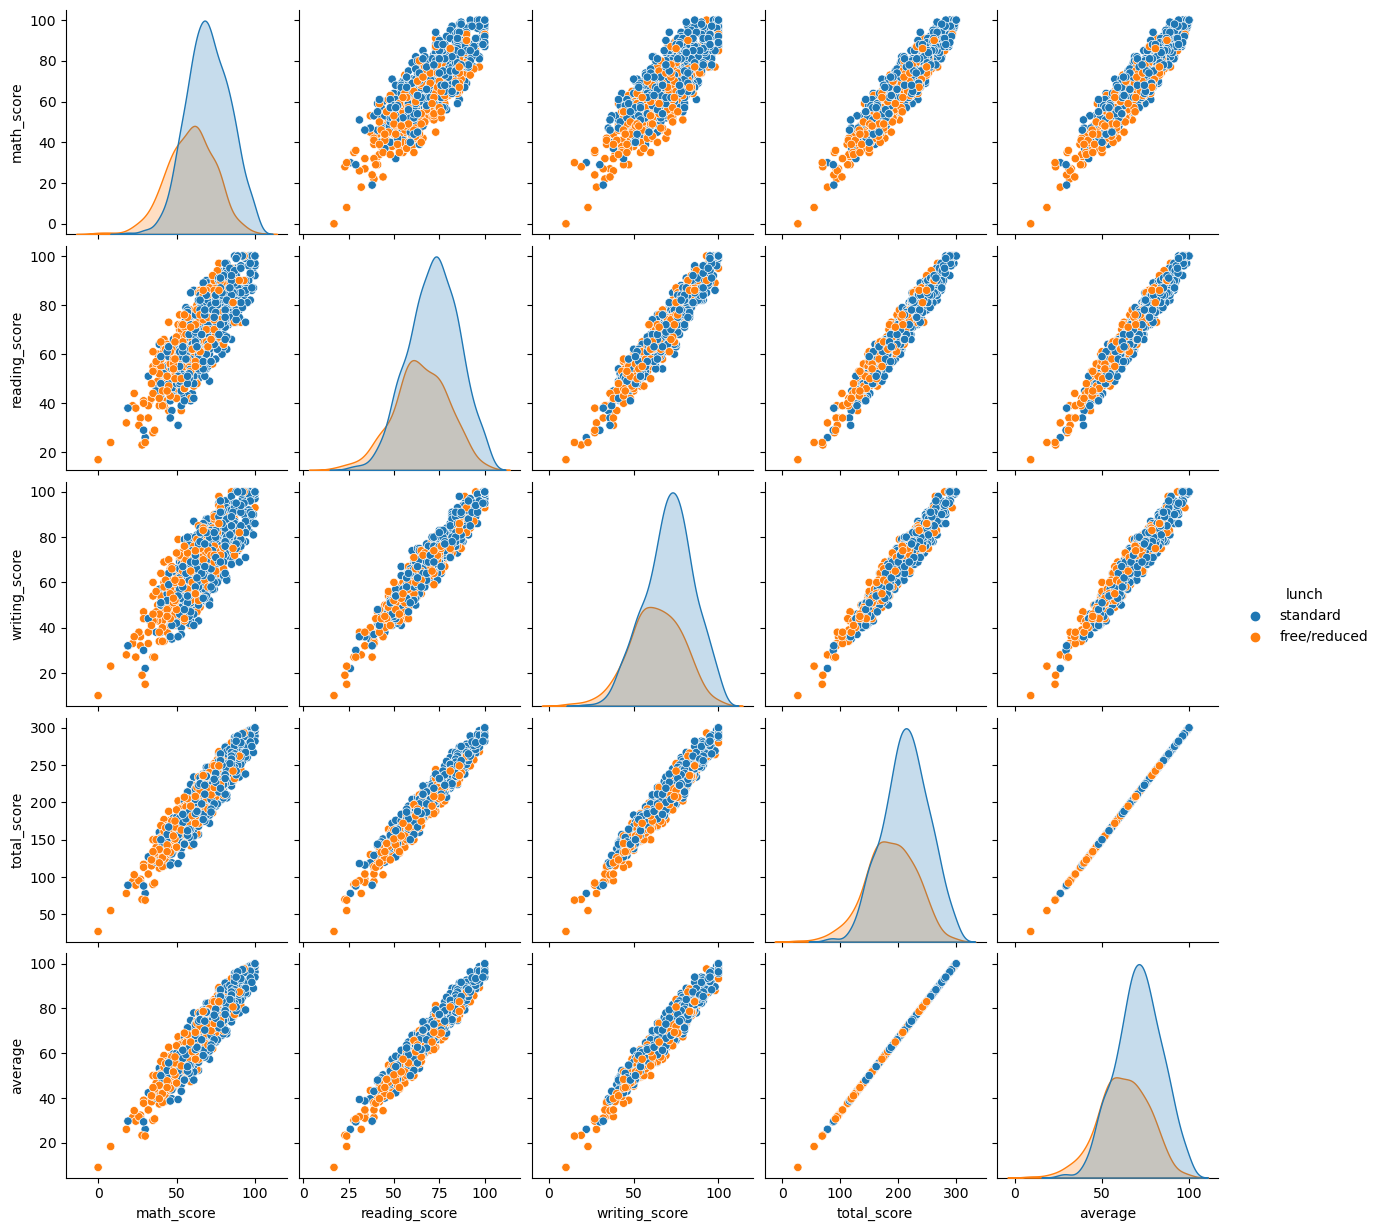

In [38]:
sns.pairplot(data,hue = 'lunch')
plt.show()

####  ► Based on Test Preparation Course

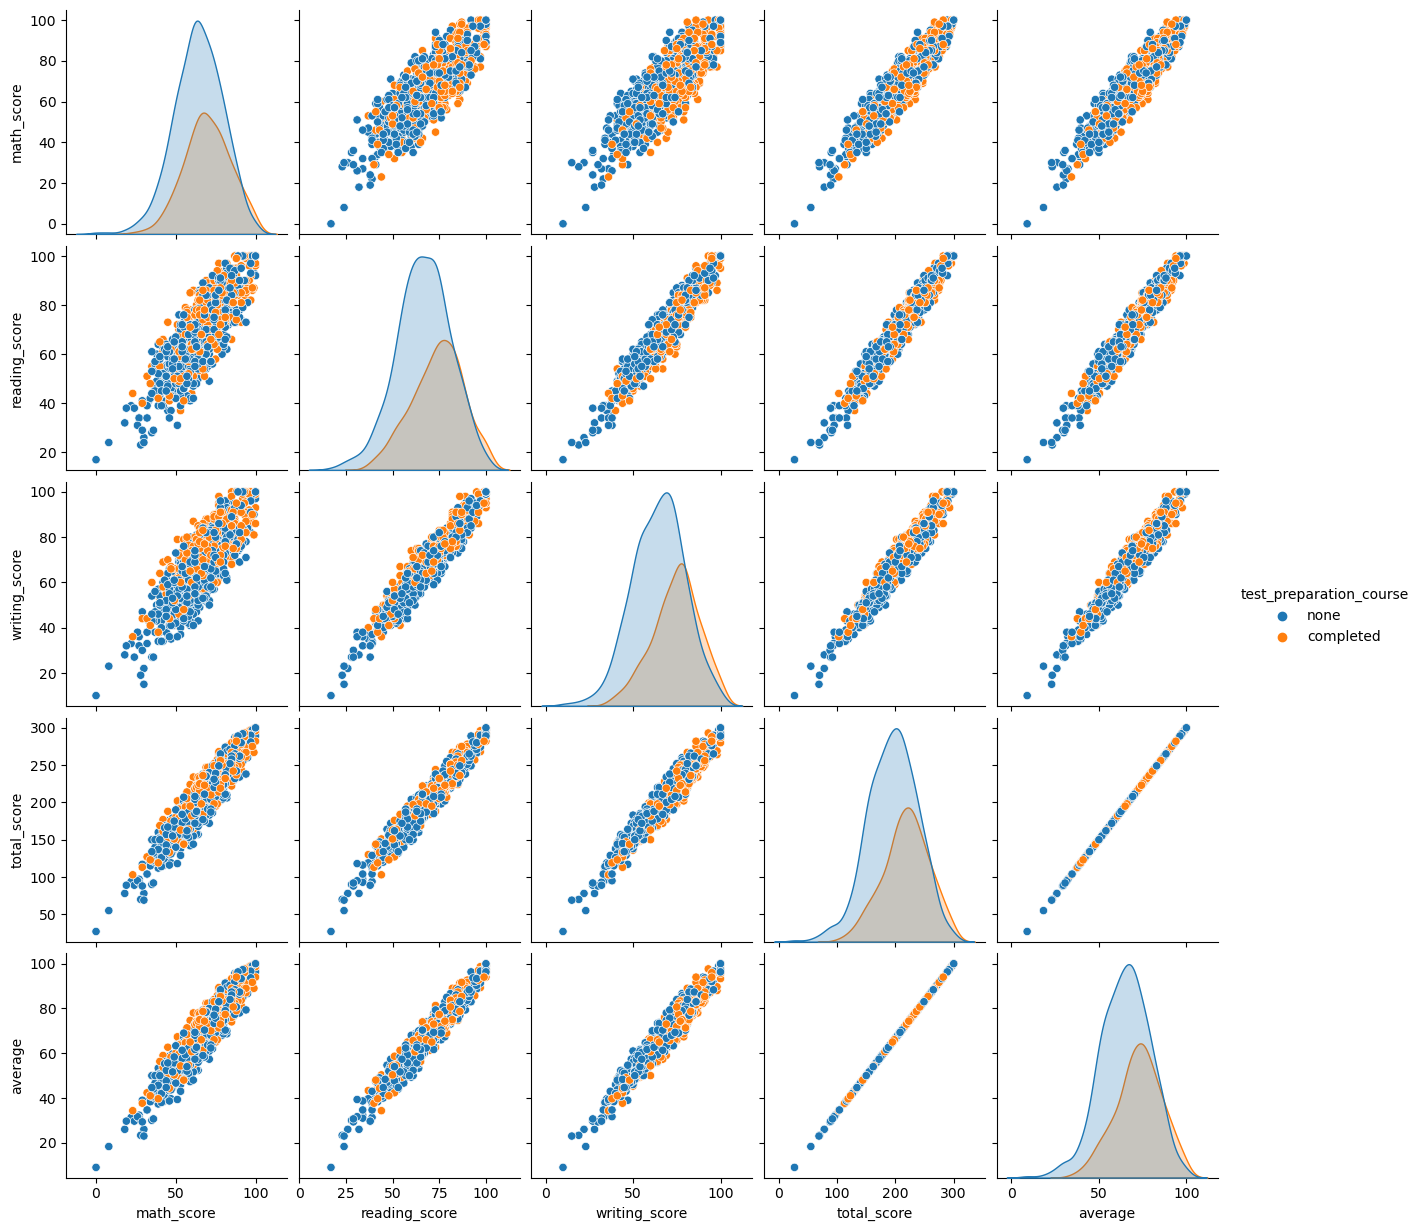

In [39]:
sns.pairplot(data,hue = 'test_preparation_course')
plt.show()

##### Insights

The above plots show all the scores increase linearly with each other.

## Conclusions

 - Student's Performance is related with gender, race, lunch, test preparation course.
 - Student's Performance is not much related with their parents' education level.
 - Females lead in pass percentage and also are top-scorers.
 - Students from a lower Socioeconomic status have a lower average in all course subjects.
 - Students having the standard lunch prove to score higher.
 - Finishing preparation course is benefitial.